# 1. Introdução

A proposta deste e-book é expandir seus horizontes na questão de visualização de dados,
aumentando seu conjunto de ferramentas para ir além do que já ouvimos no audioblog e
assistimos na videoaula. Daremos um passo além dos gráficos de dispersão, aprendendo
outras maneiras de visualizar dados, bem como algumas regras gerais a serem seguidas
ao criar visualizações (que podem ser encontradas no slide Princípios da análise gráfica
que está nas Telas Interativas).

É esperado que, ao concluir esta trilha, você tenha habilidades para discutir estes
assuntos:

Descrever quando e porque usar os seguintes tipos de visualizações:

• gráficos de dispersão;
• gráficos de linha;
• gráficos de barra;
• gráficos de histograma;

Ao obter um conjunto de dados e uma pergunta da área de negócio, é esperado que você
saiba selecionar, entre os tipos de gráfico, o mais apropriado para criar uma visualização
que melhor responde à pergunta.

Definir os três aspectos principais dos objetos ggplot:

• mapeamentos estéticos (aesthetic mappings);
• objetos geométricos (geometric objects);
• escalas (scales).

Usar a biblioteca ggplot2 em R para criar e refinar as visualizações, utilizando:

• objetos geométricos: geom_point, geom_line, geom_histogram, geom_bar, geom_vline, geom_hline;

• escalas: scale_x_continuous, scale_y_continuous;

• mapeamentos de estéticas: x, y, fill, colour, shape;

• rótulos: xlab, ylab, labs;

• controle de fonte, posicionamento de legenda e temas: theme;

• rotacionar eixos: coord_flip;

• fatiar gráficos: facet_grid;

A sintaxe para construir gráficos com ggplot pode parecer confusa em um primeiro
momento, principalmente se for seu primeiro contato com ferramentas de visualização.
A biblioteca do ggplot funciona com dataframes e não com vetores individuais, ou seja,
todos os dados necessários para fazer o gráfico estão normalmente contidos no dataframe
fornecido à função ggplot() ou podem ser fornecidos aos respectivos objetos geométricos
(geometric objects).

# 2. Base de dados Diamonds

Para aplicar o conhecimento, neste e-book, utilizaremos a base de dados Diamonds que
faz parte do pacote ggplot2. Esse dataset fornece observações sobre diamantes. Para
acessar essa base, é necessário instalar e carregar o pacote ggplot2.
Pensando em um mini dicionário para ajudar no entendimento dos exercícios, a base é
composta pelas variáveis:

• Price: preço em dólares americanos (intervalo de 326 até 18,823).

• Carat: peso do diamante (intervalo de 0.2 até 5.01).

• Cut: qualidade do corte (Fair, Good, Very Good, Premium, Ideal), indo em
escala do pior para o melhor corte.

• Color: cor do diamante, varia entre J (pior) e D (melhor).

• Clarity: medida de pureza do diamante, com escala I1 (pior), SI2, SI1, VS2,
VS1, VVS2, VVS1, IF (melhor).

• x: comprimento em milímetros (intervalo de 0 até 10.74).

• y: largura em milímetros (intervalo de 0 até 58.9).

• z: profundidade em milímetros (intervalo de 0 até 31.8).

• Depth: percentual de profundidade, que representa a equação z/mean(x,y)
=2*z/(x+y) (intervalo de 43 até 79).

• Table: largura do topo do diamante em relação à parte mais larga (intervalo de
43 até 95).

Trabalharemos os desafios em formato de perguntas e, então, aplicaremos o conhecimento
em cima dos elementos do pacote ggplot2. Estas técnicas de exploração de dados nos
ajudarão a responder às perguntas por meio de um suporte visual.

## 2. 1 Primeiras impressões

Inicializaremos com uma impressão básica da área de plotagem, utilizando duas variáveis
para definir as áreas que serão condizentes à amplitude dos eixos X e Y do gráfico em 2D.

Repare que, o eixo definido como X é da variável Price, portanto, a escala seguirá essa
amplitude. Da mesma forma, observe a escala (tamanho mínimo e máximo) do eixo Y:

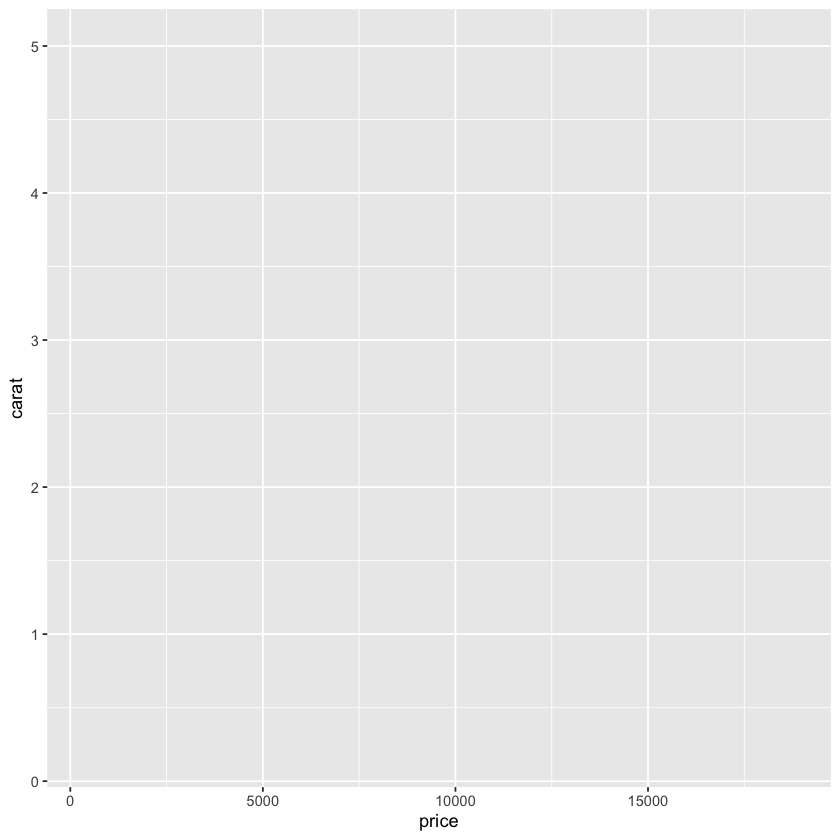

In [2]:
library(ggplot2)
ggplot(diamonds, aes(x=price, y=carat))

Ao inverter as variáveis, confira novamente os eixos X e Y para ver o resultado do tamanho da área de plotagem:

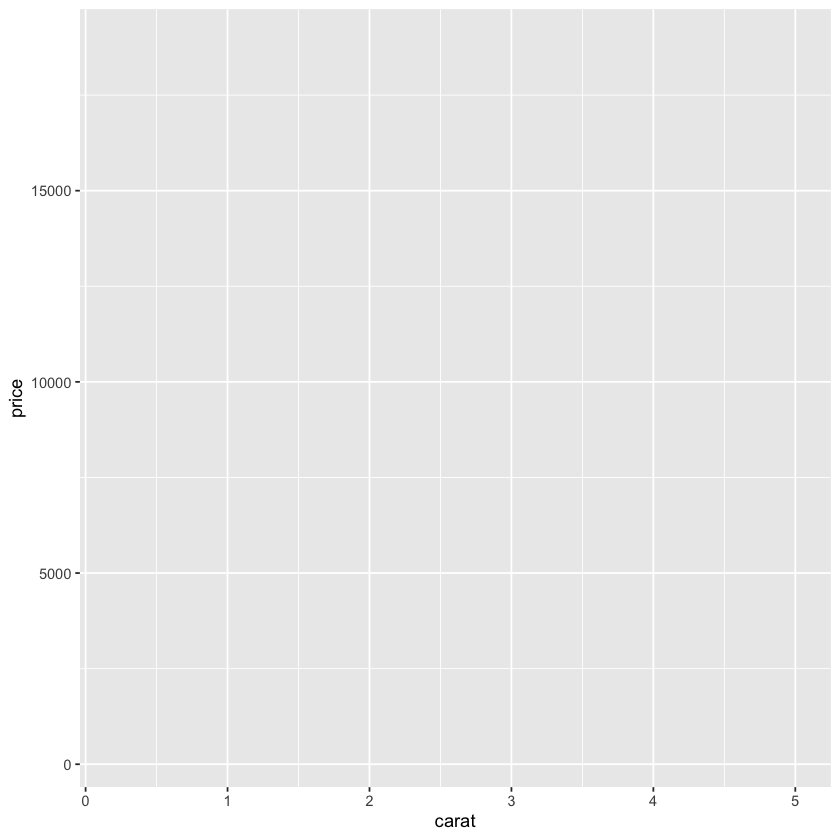

In [3]:
ggplot(diamonds, aes(x=carat, y=price))

Neste momento, a impressão foi apenas da área, sem nenhum elemento visual que nos
mostrará alguma informação dos dados. Podemos, então, adicionar um elemento de objetos
geométricos para que represente nosso dado no gráfico. A forma mais simples é utilizando o
geom_point(), que permitirá visualizar um gráfico de dispersão (pontos) a partir da junção das
duas variáveis no plano cartesiano. Veja, no código abaixo, a saída que o modelo apresenta:

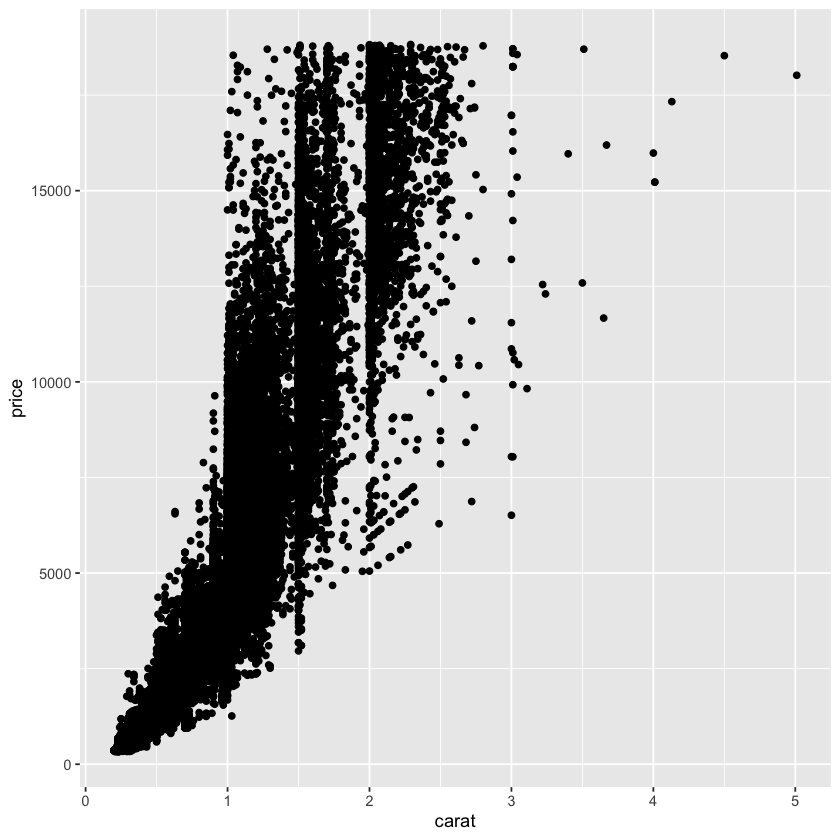

In [4]:
ggplot(diamonds, aes(x=carat, y=price)) + geom_point()

Repare que a saída é um gráfico de dispersão básico, no qual cada ponto representa
uma junção entre Carat (eixo X) e Price (eixo Y). No entanto, a maioria dos pontos está
concentrada na parte inferior esquerda do gráfico. Isso acontece porque há uma maior
concentração de diamantes que são mais leves e custam menos. Com o passar dos
exercícios, exploraremos cada vez mais essas características.

Para deixar o gráfico autoexplicativo para quem for consumir, é importante ajustar os
nomes dos componentes. Para fazer isso, adicionaremos o título ao gráfico e também
rótulos para os eixos X e Y. Para questões pedagógicas, utilizaremos as funções separadas
para ggtitle(), xlab() e ylab(), que representam o ajuste do título e, em seguida, dos rótulos
do eixo X e Y. Veja o código como fica:

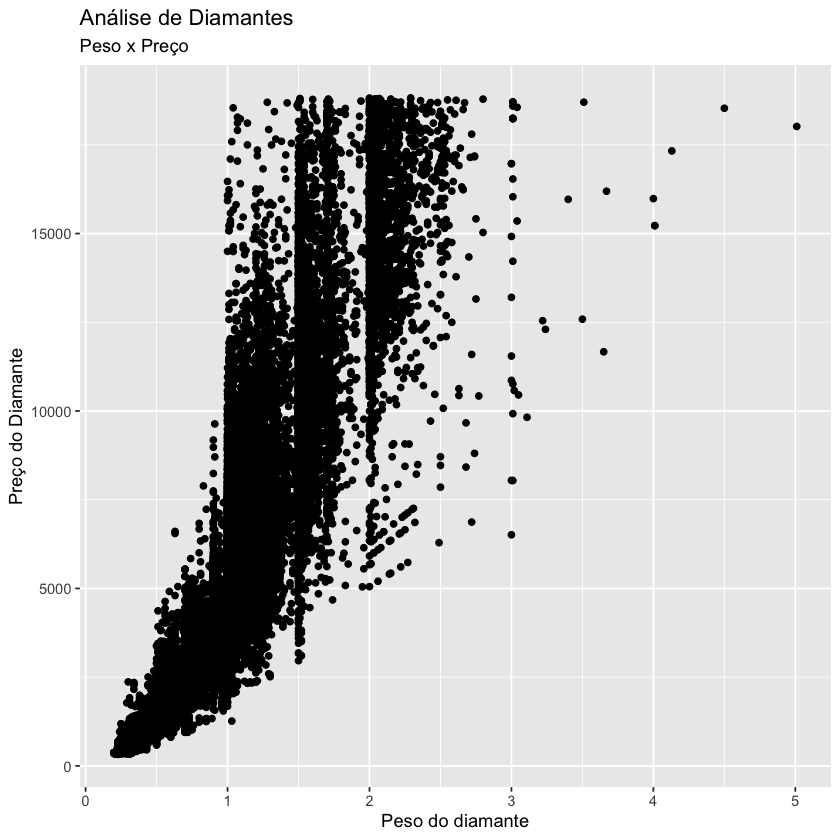

In [5]:
ggplot(diamonds, aes(x=carat, y=price)) + geom_point() +
ggtitle("Análise de Diamantes", subtitle="Peso x Preço") +
xlab("Peso do diamante") +
ylab("Preço do Diamante")

É possível ajustar a camada estética de um elemento geométrico, modificando os
respectivos parâmetros. Mudaremos a cor dos pontos e também seu tamanho. Repare no
código que está dentro do geom_point(). O parâmetro col define a cor e o parâmetro size
define o tamanho:

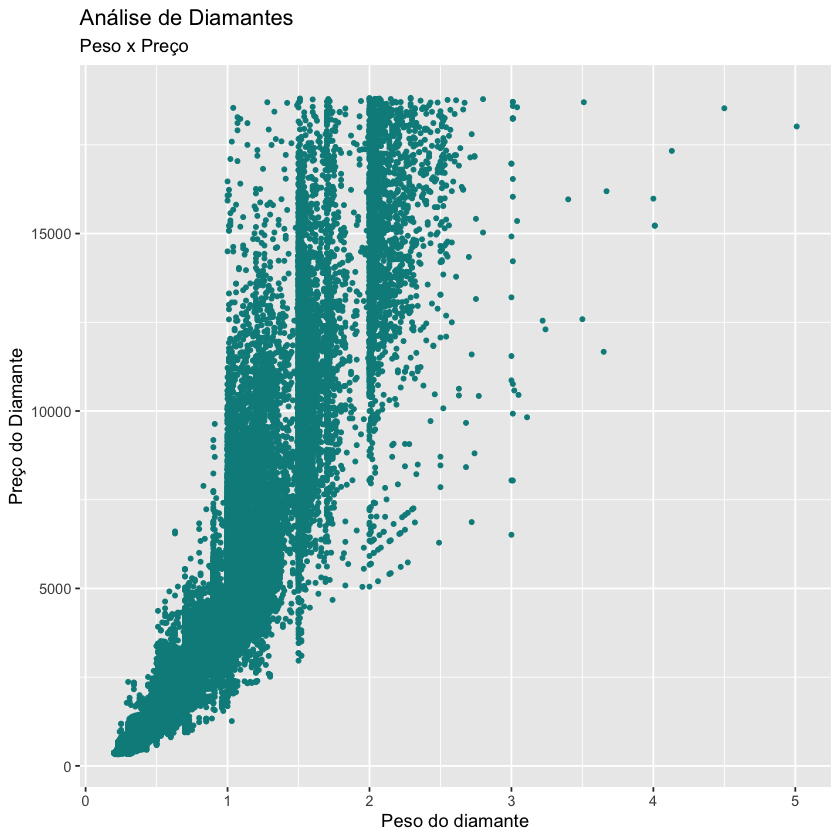

In [6]:
ggplot(diamonds, aes(x=carat, y=price)) + 
geom_point(col="darkcyan", size=1) +
ggtitle("Análise de Diamantes", subtitle="Peso x Preço") +
xlab("Peso do diamante") +
ylab("Preço do Diamante")

Já que é possível ajustar os valores do elemento geométrico a partir de valores fixos, o que
será que acontece se passarmos variáveis para esses parâmetros? Veremos como fica
este elemento gráfico ao utilizarmos a variável carat no tamanho dos pontos impressos.
Veja este bloco de código:

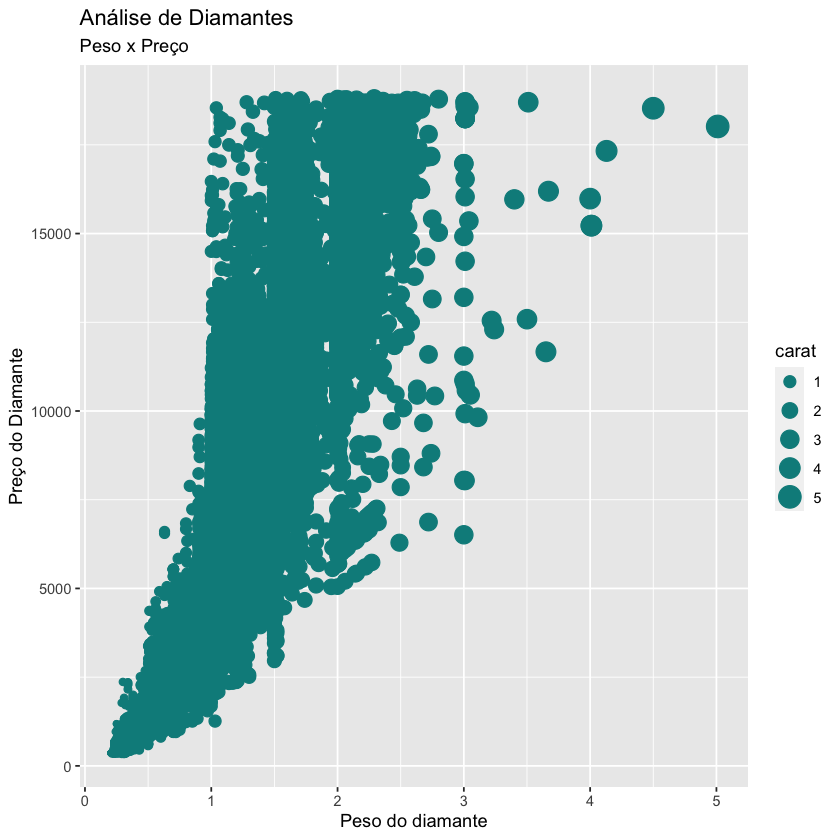

In [7]:
ggplot(diamonds, aes(x=carat, y=price)) + 
geom_point(col="darkcyan", aes(size=carat)) +
ggtitle("Análise de Diamantes", subtitle="Peso x Preço") +
xlab("Peso do diamante") +
ylab("Preço do Diamante")

Da mesma forma que foi possível definir o tamanho do objeto impresso no gráfico, será
que conseguimos explorar também a impressão de cores a partir de uma variável? Ao
incluir a variável Clarity no parâmetro col, a aparência do gráfico fica como a impressão
a seguir. Repare que, tanto o tamanho dos pontos quanto a cor estão variando de acordo
com a variável que foi utilizada em sua impressão:

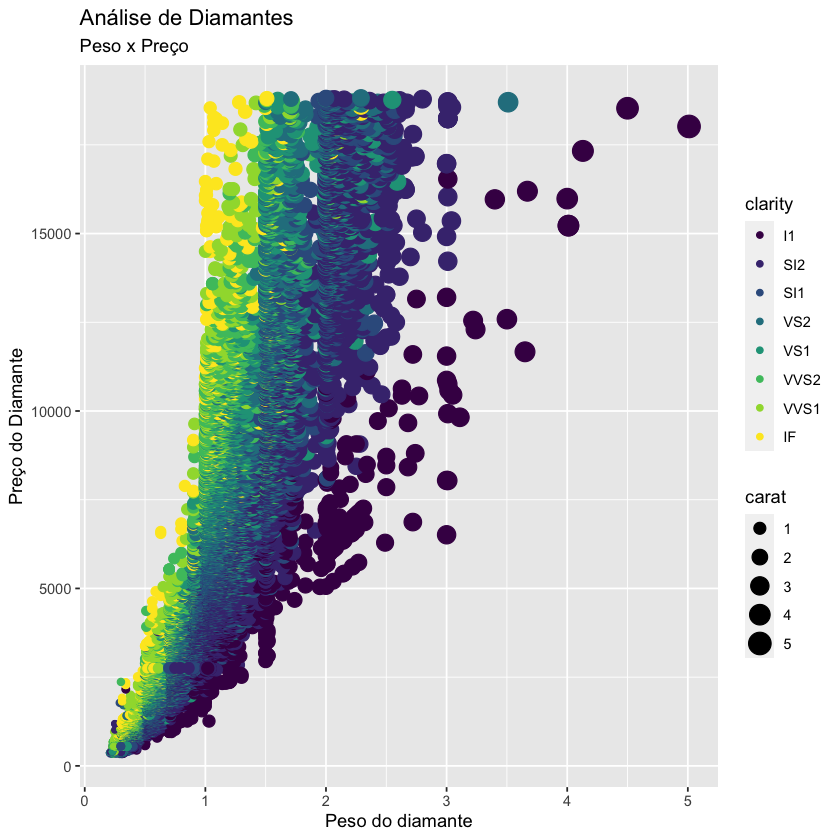

In [8]:
ggplot(diamonds, aes(x=carat, y=price)) + 
geom_point(aes(col=clarity, size=carat)) +
ggtitle("Análise de Diamantes", subtitle="Peso x Preço") +
xlab("Peso do diamante") +
ylab("Preço do Diamante")

Para chegar ao fim desta exploração inicial, podemos alterar a aparência da área de
plotagem inteira usando temas pré-definidos. A página de ajuda mostra todos os temas
integrados disponíveis, assim como estão disponíveis lá no arquivo de Telas Interativas
alguns exemplos de temas utilizados em um gráfico:

In [9]:
help(theme_bw)

ggtheme                package:ggplot2                 R Documentation

_C_o_m_p_l_e_t_e _t_h_e_m_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     These are complete themes which control all non-data display. Use
     ‘theme()’ if you just need to tweak the display of an existing
     theme.

_U_s_a_g_e:

     theme_grey(
       base_size = 11,
       base_family = "",
       base_line_size = base_size/22,
       base_rect_size = base_size/22
     )
     
     theme_gray(
       base_size = 11,
       base_family = "",
       base_line_size = base_size/22,
       base_rect_size = base_size/22
     )
     
     theme_bw(
       base_size = 11,
       base_family = "",
       base_line_size = base_size/22,
       base_rect_size = base_size/22
     )
     
     theme_linedraw(
       base_size = 11,
       base_family = "",
       base_line_size = base_size/22,
       base_rect_size = base_size/22
     )
     
     theme_light(
       base_size = 11,
       base_family = "

Para ajustar o tema, é necessário incluir à instrução do ggplot a configuração geral do
tema (por exemplo, theme_bw()):

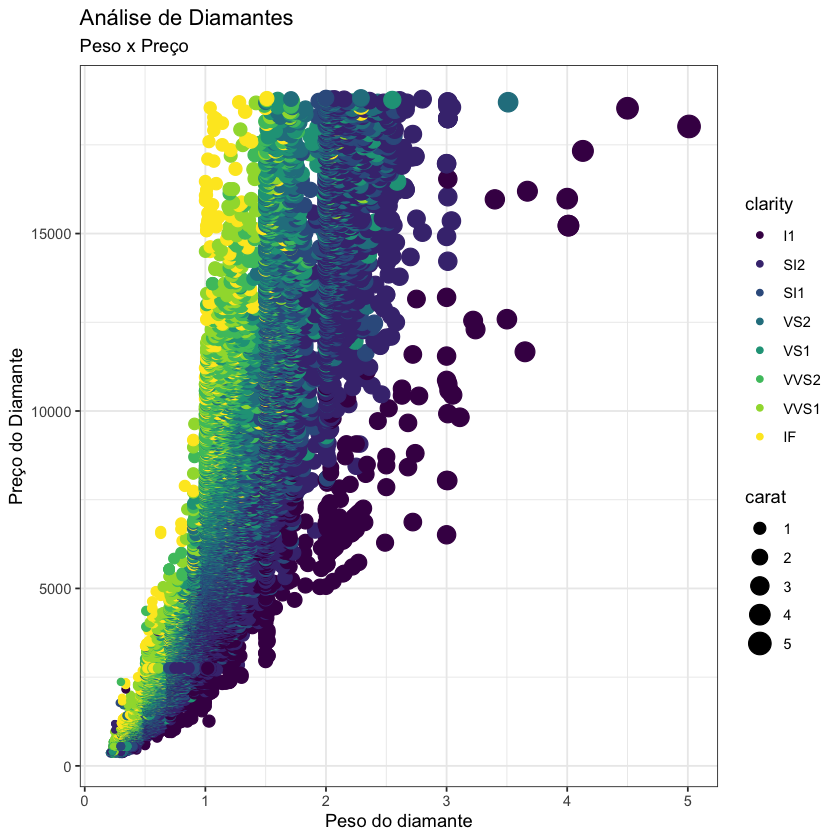

In [10]:
ggplot(diamonds, aes(x=carat, y=price)) + 
geom_point(aes(col=clarity, size=carat)) +
ggtitle("Análise de Diamantes", subtitle="Peso x Preço") +
xlab("Peso do diamante") +
ylab("Preço do Diamante") + 
theme_bw()

## 2.2 Visualizações mais avançadas

Como vimos na seção **Primeiras impressões**, as camadas em ggplot2 são conhecidas
como **geoms**. Assim que a configuração da base de seu gráfico estiver concluída, você
pode adicionar novos **geoms** um em cima do outro.

Neste caso, veja que adicionamos duas camadas a esse gráfico. Inicialmente, lá no
primeiro gráfico que construímos, era só o geom_point() e agora, adicionamos uma nova
camada, geom_smooth().

Em gráficos de dispersão, pode ser difícil de visualizar tendências, principalmente porque
são apenas pontos impressos. Muitas vezes, para ajudar nesse sentido, adicionamos uma
linha de suavização para ver como são as tendências. Isso pode ser especialmente útil
ao tentar entender as regressões (estimação de valores numéricos). O geom_smoth ajuda
exatamente com isso, pois ele adiciona uma média condicional suavizada nos dados:

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



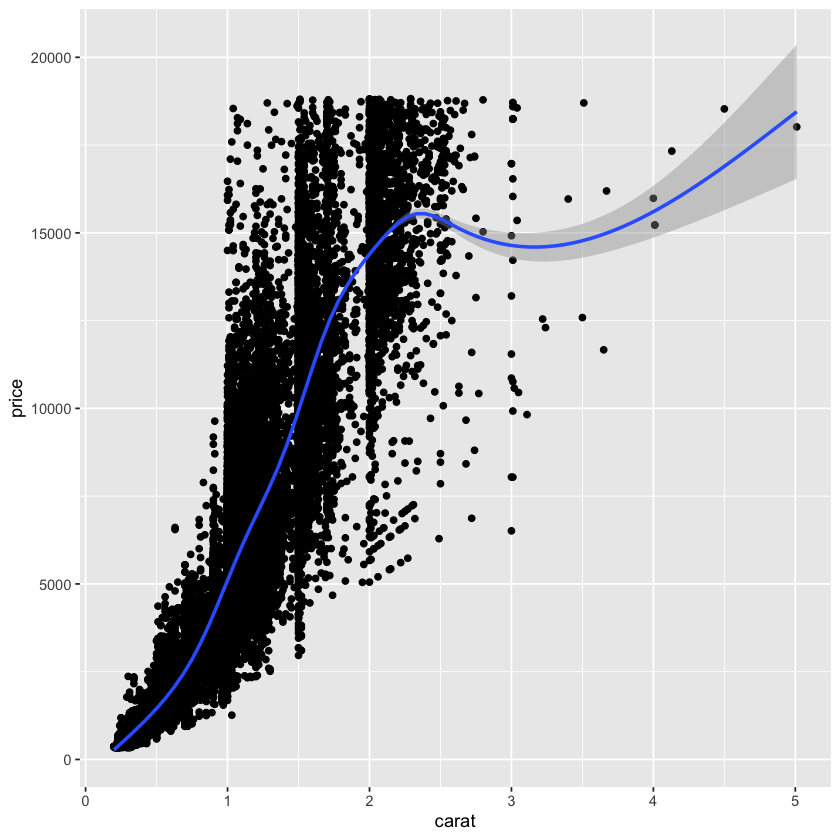

In [11]:
ggplot(diamonds, aes(x=carat, y=price)) + 
geom_point() + 
geom_smooth()

Elaborando um pouco mais esse gráfico, veja que o eixo X, o eixo Y e a cor foram
definidos na configuração da própria ggplot(), portanto essas duas camadas herdaram
a estética. Alternativamente, você pode especificar a estética dentro da camada **geom**,
como mostrado abaixo. E, neste caso, ao herdar os elementos de estética, cada série da
Clarity montará uma linha de tendência com a suavização:

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



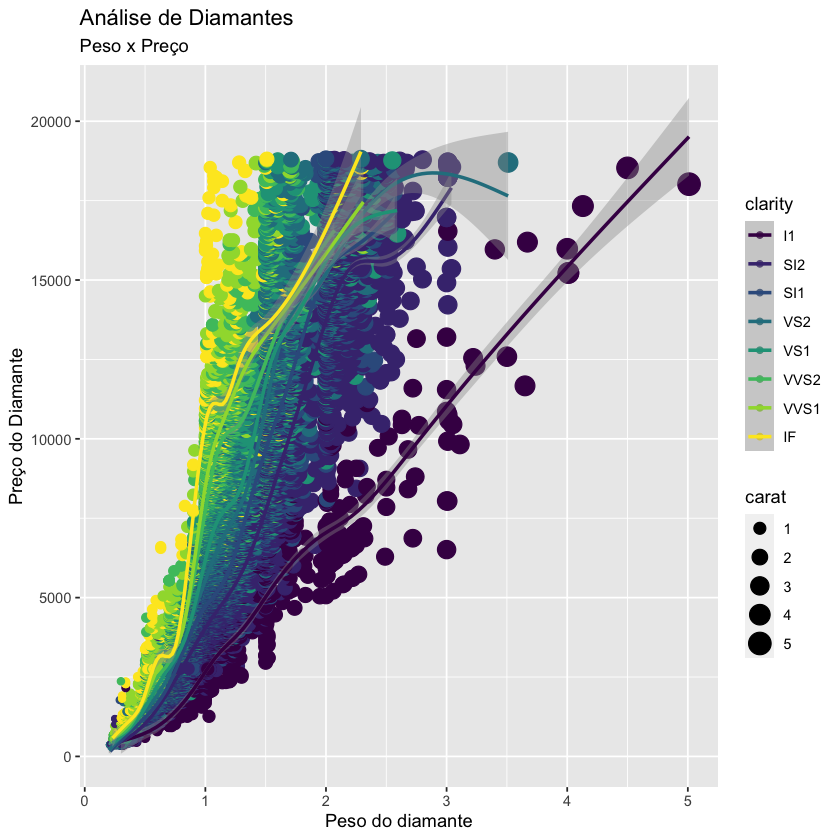

In [12]:
ggplot(diamonds, aes(x=carat, y=price)) + 
geom_point(aes(col=clarity, size=carat)) +
ggtitle("Análise de Diamantes", subtitle="Peso x Preço") +
xlab("Peso do diamante") +
ylab("Preço do Diamante") + 
geom_smooth(aes(x=carat, y=price, col=clarity))

A visualização não ficou tão simples de enxergar com todos esses dados amontoados.
Neste caso, uma alternativa elegante para gerar a visualização é separar os dados em
faces, nas quais cada face representará um subgrupo do conjunto de dados. Essa
segmentação é realizada com o elemento facet_wrap, que recebe o nome da variável
com a qual se deseja fazer a segmentação dos dados. Repare no código abaixo, ao
informar a variável Clarity no elemento de facet_wrap, os dados são segmentados em
cada um dos valores existentes na variável Clarity e então o gráfico é feito utilizando cada
um desses subgrupos. Veja o resultado deste gráfico:

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



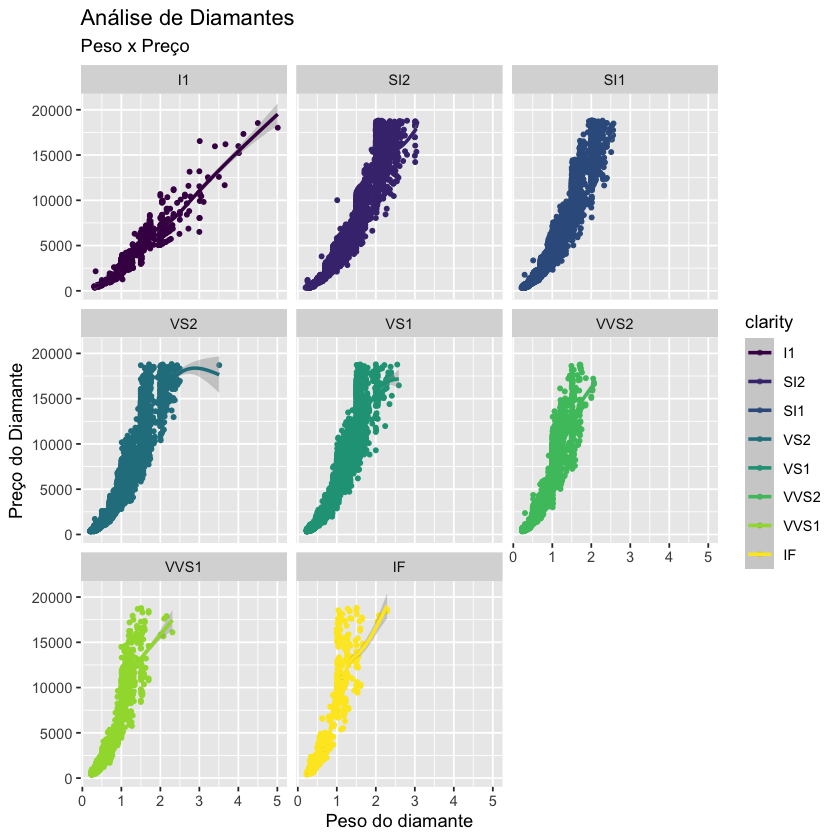

In [17]:
ggplot(diamonds, aes(x=carat, y=price)) + 
geom_point(aes(col=clarity), size=1) +
ggtitle("Análise de Diamantes", subtitle="Peso x Preço") +
xlab("Peso do diamante") +
ylab("Preço do Diamante") + 
geom_smooth(aes(x=carat, y=price, col=clarity)) +
facet_wrap( ~ clarity)

## 2. 3 Paleta de cores

Neste e-book, você viu sempre as mesmas cores de gráficos porque elas são da paleta
de cores padrão da biblioteca ggplot2. Se você se lembrar, em outros materiais aqui
do componente curricular, já usamos cores diferentes. Podemos fazer isso também no
ggplot2! No R, uma das bibliotecas que fornece paletas de cores alternativas, temos a
RColorBrewer. Já a usamos antes e a utilizaremos agora de novo.

O caminho é simples, veja:

• Carregue a biblioteca RColorBrewer.

• Imprima a lista de paletas disponíveis com a função display.brewer.all().

• Ao decidir sua paleta de cores, aplique ao gráfico.

Para iniciar, veremos como é o carregamento da biblioteca e, então, veremos sua paleta
de cores. Acompanhe o código abaixo:

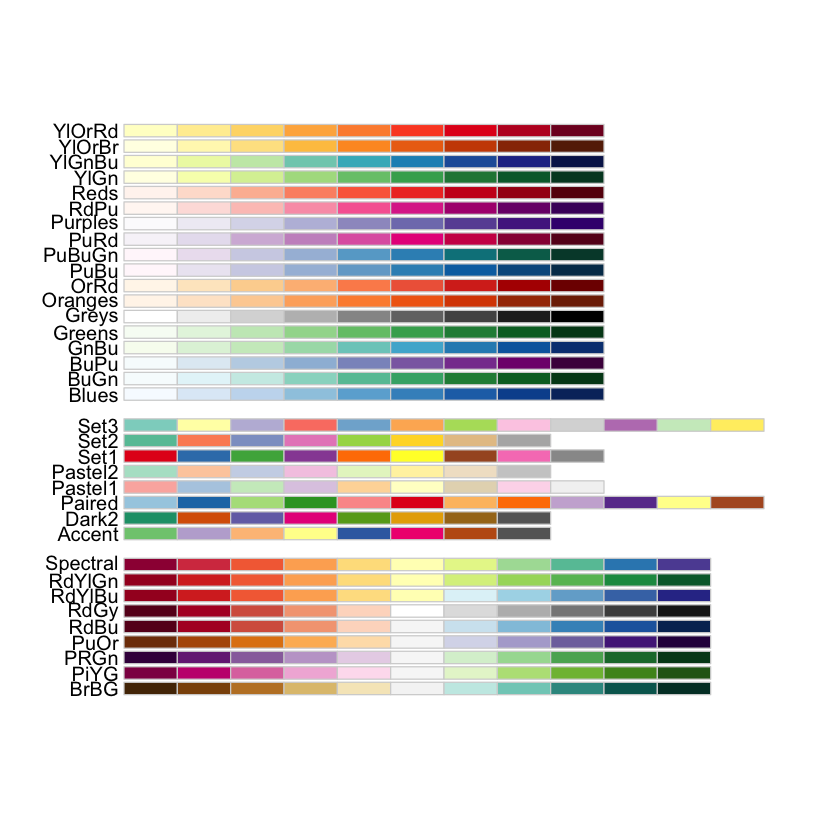

In [14]:
library(RColorBrewer)
display.brewer.all()

Veja um exemplo de gráfico que explora essa base de dados. Espero que você já consiga
interpretar os elementos utilizados neste gráfico:

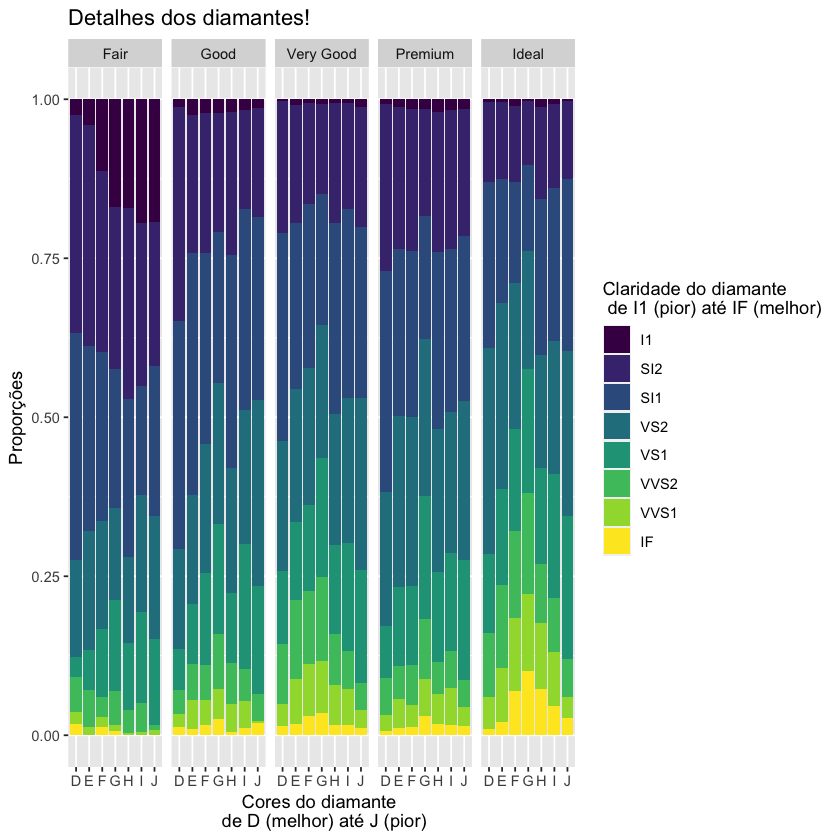

In [15]:
graficoDiamantes <- ggplot(diamonds, aes(x = color, fill = clarity)) + 
geom_bar(position = 'fill') + 
xlab('Cores do diamante \n de D (melhor) até J (pior)') + 
ylab('Proporções') +
labs(fill = "Claridade do diamante \n de I1 (pior) até IF (melhor)") + 
facet_grid(. ~ cut) + 
ggtitle("Detalhes dos diamantes!")

graficoDiamantes

# 3. Síntese

Neste e-book, estudamos o pacote ggplot2 e algumas de suas formas de geração de
gráficos:

• Escala de tamanho.

• Elementos geométricos.

• Segmentação de dados.

• Linhas de tendências.

• Sobreposição de elementos.

# 4. Referências

KNAFLIC, C. N. **Storytelling com dados**: um guia sobre visualização de dados para
profissionais de negócios. Rio de Janeiro: Alta Books, 2019.

SILVA, L. A.; PERES, S. M.; BOSCARIOLI, C. **Introdução à mineração de dados**: com
aplicações em R. Rio de Janeiro: Elsevier, 2017.

WICKHAM, H.; GROLEMUND, G. R for data science: import, tidy, transform, visualize,
and model data **bold text**. Massachusetts: O’Reilly Media, Inc., 2016.